In [ ]:
!pip install tensorflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 587.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.3 MB/s eta 0:00:00


# **Load features+labels**

In [ ]:
import os
import pandas as pd
import numpy as np
import re
from collections import Counter
import pandas as pd
import os
from glob import glob
import joblib

In [ ]:
# Specify the file path
#file_path = '/content/drive/MyDrive/main_df.csv'

# Load the CSV file into a DataFrame
main_df = pd.read_csv(file_path)

In [ ]:
main_df

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Valence,Arousal,Dominance,Liking,source_file
0,1,0,0.00,0.98,1,-0.038215,0.186270,-0.981755,-0.243648,0.195652,...,0.0,0.0,0.0,0.0,0.0,6.96,3.92,7.19,6.05,s01_trial01.csv
1,2,0,0.02,0.98,1,-0.040259,0.178876,-0.983048,-0.237609,0.181597,...,0.0,0.0,0.0,0.0,0.0,6.96,3.92,7.19,6.05,s01_trial01.csv
2,3,0,0.04,0.98,1,-0.046330,0.173340,-0.983772,-0.241295,0.180079,...,0.0,0.0,0.0,0.0,0.0,6.96,3.92,7.19,6.05,s01_trial01.csv
3,4,0,0.06,0.98,1,-0.046832,0.176331,-0.983216,-0.237119,0.184595,...,0.0,0.0,0.0,0.0,0.0,6.96,3.92,7.19,6.05,s01_trial01.csv
4,5,0,0.08,0.98,1,-0.051189,0.178612,-0.982587,-0.237575,0.187091,...,0.0,0.0,0.0,0.0,0.0,6.96,3.92,7.19,6.05,s01_trial01.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591995,2996,0,59.90,0.98,1,0.040680,0.144007,-0.988740,-0.062873,0.154431,...,0.0,0.0,0.0,0.0,0.0,7.06,5.99,6.04,7.05,s22_trial40.csv
2591996,2997,0,59.92,0.98,1,0.042779,0.138047,-0.989501,-0.052650,0.157885,...,0.0,0.0,0.0,0.0,0.0,7.06,5.99,6.04,7.05,s22_trial40.csv
2591997,2998,0,59.94,0.98,1,0.030957,0.148650,-0.988405,-0.062896,0.150866,...,0.0,0.0,0.0,0.0,0.0,7.06,5.99,6.04,7.05,s22_trial40.csv
2591998,2999,0,59.96,0.98,1,0.042978,0.181350,-0.982479,-0.073645,0.167846,...,0.0,0.0,0.0,0.0,0.0,7.06,5.99,6.04,7.05,s22_trial40.csv


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592000 entries, 0 to 2591999
Columns: 719 entries, frame to source_file
dtypes: float64(715), int64(3), object(1)
memory usage: 13.9+ GB


In [ ]:
#pip install openpyxl

In [ ]:
main_df.iloc[:, 5:-6]

,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,...,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c
0,-0.038215,0.186270,-0.981755,-0.243648,0.195652,-0.949924,-0.145,0.195,377.5,380.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.040259,0.178876,-0.983048,-0.237609,0.181597,-0.954235,-0.142,0.184,377.4,380.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.046330,0.173340,-0.983772,-0.241295,0.180079,-0.953597,-0.147,0.180,377.3,380.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.046832,0.176331,-0.983216,-0.237119,0.184595,-0.953782,-0.146,0.184,377.2,379.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.051189,0.178612,-0.982587,-0.237575,0.187091,-0.953182,-0.148,0.187,377.1,379.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591995,0.040680,0.144007,-0.988740,-0.062873,0.154431,-0.986001,-0.011,0.150,333.6,336.1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2591996,0.042779,0.138047,-0.989501,-0.052650,0.157885,-0.986053,-0.005,0.149,333.7,336.3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2591997,0.030957,0.148650,-0.988405,-0.062896,0.150866,-0.986551,-0.016,0.151,333.7,336.2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2591998,0.042978,0.181350,-0.982479,-0.073645,0.167846,-0.983059,-0.016,0.176,333.9,336.2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **Arousal**

In [ ]:
main_df['Arousal']

,Arousal
0,3.92
1,3.92
2,3.92
3,3.92
4,3.92
...,...
2591995,5.99
2591996,5.99
2591997,5.99
2591998,5.99


In [ ]:
# Thresholding the 'arousal' column
main_df['arousal_bin'] = (main_df['Arousal'] >= 4.5).astype(int)

In [ ]:
Counter(main_df['arousal_bin'])

Counter({0: 933000, 1: 1659000})

In [ ]:
# Features (all columns except the last 13)
X = main_df.iloc[:, 5:-6].values

# Labels (binary column 'arousal_bin')
y = main_df['arousal_bin'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[-0.083051,  0.065726, -0.994376, ...,  0.      ,  0.      ,
         0.      ],
       [-0.022775,  0.139665, -0.989937, ...,  0.      ,  0.      ,
         0.      ],
       [-0.012558,  0.27994 , -0.959935, ...,  1.      ,  0.      ,
         1.      ],
       ...,
       [-0.097036,  0.14361 , -0.984866, ...,  0.      ,  0.      ,
         0.      ],
       [-0.125262,  0.203313, -0.971068, ...,  0.      ,  0.      ,
         0.      ],
       [-0.136752,  0.16993 , -0.975922, ...,  0.      ,  0.      ,
         0.      ]])

In [ ]:
y_train

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
# Normalize features for better training (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.98122295, -1.45921692, -0.65446011, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [ 0.04851898, -0.70708798, -0.53708069, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [ 0.22306396,  0.71982999,  0.25625501, ...,  9.3605113 ,
        -0.01066887,  3.10919694],
       ...,
       [-1.22013961, -0.66695829, -0.40298945, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [-1.70234639, -0.05964207, -0.03813224, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [-1.89863902, -0.39922362, -0.1664854 , ..., -0.10683177,
        -0.01066887, -0.32162646]])

In [ ]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,  # Adjust epochs based on performance
    batch_size=32,  # Adjust batch size based on data size
    verbose=1
)

Epoch 1/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 215s 3ms/step - accuracy: 0.6873 - loss: 0.5692 - val_accuracy: 0.7759 - val_loss: 0.4325
Epoch 2/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 201s 3ms/step - accuracy: 0.7615 - loss: 0.4539 - val_accuracy: 0.8046 - val_loss: 0.3820
Epoch 3/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 204s 3ms/step - accuracy: 0.7817 - loss: 0.4195 - val_accuracy: 0.8184 - val_loss: 0.3607
Epoch 4/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 216s 3ms/step - accuracy: 0.7932 - loss: 0.3983 - val_accuracy: 0.8306 - val_loss: 0.3461
Epoch 5/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 216s 3ms/step - accuracy: 0.8006 - loss: 0.3847 - val_accuracy: 0.8312 - val_loss: 0.3359
Epoch 6/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 207s 3ms/step - accuracy: 0.8045 - loss: 0.3765 - val_accuracy: 0.8381 - val_loss: 0.3180
Epoch 7/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 212s 3ms/step - accuracy: 0.8088 - loss: 0.3681 - val_accuracy: 0.8470 - val_loss: 0.3202
Epoch 8/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 207s 3ms/step - ac

In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 81.49%


5400/5400 [==============================] - 8s 1ms/step


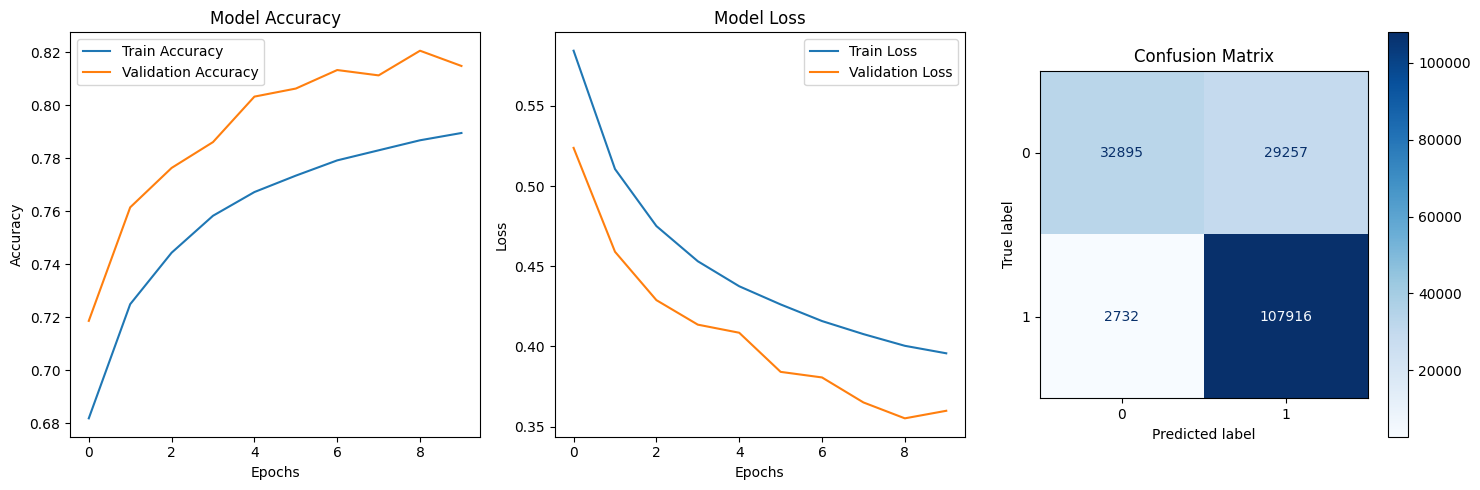

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
y_true = y_test  # True class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Create subplots: 1 row, 3 columns
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot training & validation accuracy
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot training & validation loss
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(ax=ax[2], cmap="Blues")
ax[2].set_title('Confusion Matrix')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

Save to .pkl

In [ ]:
save_path = "/content/drive/MyDrive/"

# Save the best model with the specified name
save_file = f"{save_path}/fyp3_arousal.pkl"
joblib.dump(model, save_file)

['/content/drive/MyDrive//fyp3_arousal.pkl']

Load from .pkl

In [ ]:
# temp=X_test[268400]

# # Assuming X_test[0] has shape (709,)
# reshaped_data = np.reshape(temp, (1, temp.shape[0]))

In [ ]:
# import joblib

# # Specify the path to the saved model file
# save_path = "/content/drive/MyDrive/"
# save_file = f"{save_path}/fyp3_arousal.pkl"

# # Load the model
# loaded_model = joblib.load(save_file)

# # Make predictions on the test data
# y_pred = loaded_model.predict(reshaped_data)

# binary_prediction = (y_pred > 0.5).astype(int)
# print(binary_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[0]]


# **Dominance**

In [ ]:
main_df['Dominance']

,Dominance
0,7.19
1,7.19
2,7.19
3,7.19
4,7.19
...,...
2591995,6.04
2591996,6.04
2591997,6.04
2591998,6.04


In [ ]:
# Thresholding the 'Dominance' column
main_df['dominance_bin'] = (main_df['Dominance'] >= 4.5).astype(int)

In [ ]:
Counter(main_df['dominance_bin'])

Counter({1: 1602000, 0: 990000})

In [ ]:
# Features (all columns except the last 13)
X = main_df.iloc[:, 5:-6].values

# Labels (binary column 'arousal_bin')
y = main_df['dominance_bin'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[-0.083051,  0.065726, -0.994376, ...,  0.      ,  0.      ,
         0.      ],
       [-0.022775,  0.139665, -0.989937, ...,  0.      ,  0.      ,
         0.      ],
       [-0.012558,  0.27994 , -0.959935, ...,  1.      ,  0.      ,
         1.      ],
       ...,
       [-0.097036,  0.14361 , -0.984866, ...,  0.      ,  0.      ,
         0.      ],
       [-0.125262,  0.203313, -0.971068, ...,  0.      ,  0.      ,
         0.      ],
       [-0.136752,  0.16993 , -0.975922, ...,  0.      ,  0.      ,
         0.      ]])

In [ ]:
y_train

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
# Normalize features for better training (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.98122295, -1.45921692, -0.65446011, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [ 0.04851898, -0.70708798, -0.53708069, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [ 0.22306396,  0.71982999,  0.25625501, ...,  9.3605113 ,
        -0.01066887,  3.10919694],
       ...,
       [-1.22013961, -0.66695829, -0.40298945, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [-1.70234639, -0.05964207, -0.03813224, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [-1.89863902, -0.39922362, -0.1664854 , ..., -0.10683177,
        -0.01066887, -0.32162646]])

In [ ]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,  # Adjust epochs based on performance
    batch_size=32,  # Adjust batch size based on data size
    verbose=1
)

Epoch 1/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 215s 3ms/step - accuracy: 0.6723 - loss: 0.5803 - val_accuracy: 0.7596 - val_loss: 0.4741
Epoch 2/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 203s 3ms/step - accuracy: 0.7444 - loss: 0.4826 - val_accuracy: 0.7926 - val_loss: 0.4214
Epoch 3/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 200s 3ms/step - accuracy: 0.7645 - loss: 0.4527 - val_accuracy: 0.8078 - val_loss: 0.3980
Epoch 4/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 202s 3ms/step - accuracy: 0.7783 - loss: 0.4341 - val_accuracy: 0.8175 - val_loss: 0.3848
Epoch 5/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 204s 3ms/step - accuracy: 0.7875 - loss: 0.4207 - val_accuracy: 0.8237 - val_loss: 0.3666
Epoch 6/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 211s 3ms/step - accuracy: 0.7935 - loss: 0.4119 - val_accuracy: 0.8307 - val_loss: 0.3607
Epoch 7/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 211s 3ms/step - accuracy: 0.7979 - loss: 0.4059 - val_accuracy: 0.8391 - val_loss: 0.3517
Epoch 8/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 209s 3ms/step - ac

In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 84.08%


16200/16200 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step


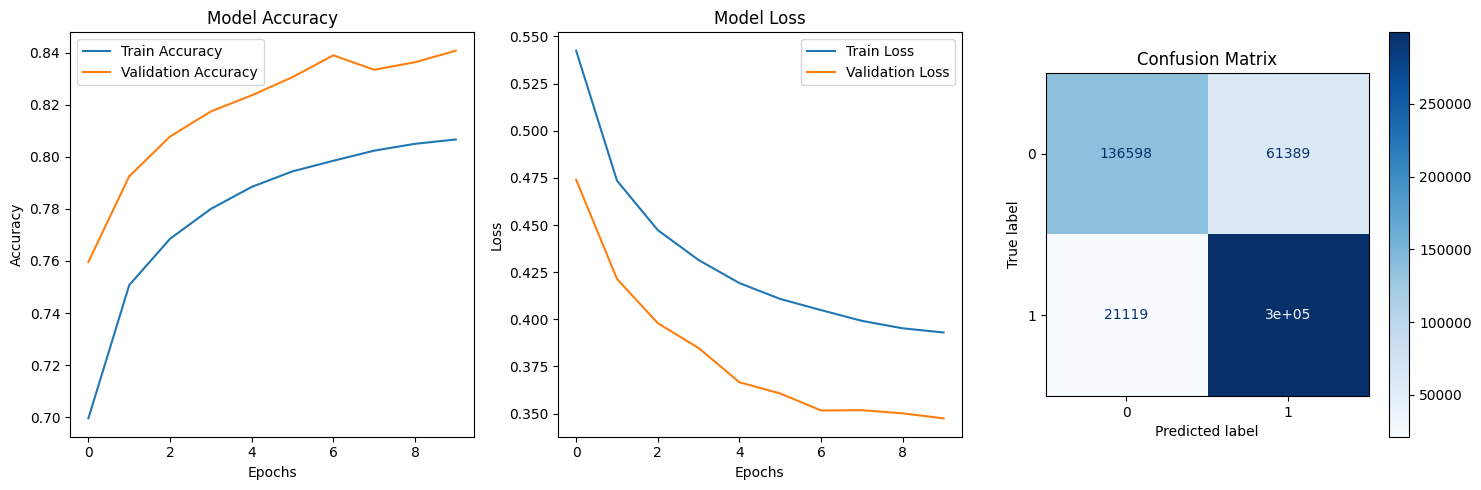

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
y_true = y_test  # True class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Create subplots: 1 row, 3 columns
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot training & validation accuracy
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot training & validation loss
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(ax=ax[2], cmap="Blues")
ax[2].set_title('Confusion Matrix')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

Save to .pkl

In [ ]:
save_path = "/content/drive/MyDrive/"

# Save the best model with the specified name
save_file = f"{save_path}/fyp3_dominance.pkl"
joblib.dump(model, save_file)

['/content/drive/MyDrive//fyp3_dominance.pkl']

Load from .pkl

In [ ]:
# temp=X_test[268400]

# # Assuming X_test[0] has shape (709,)
# reshaped_data = np.reshape(temp, (1, temp.shape[0]))

In [ ]:
import joblib

# Specify the path to the saved model file
save_path = "/content/drive/MyDrive/"
save_file = f"{save_path}/fyp3_dominance.pkl"

# Load the model
loaded_model = joblib.load(save_file)

# Make predictions on the test data
y_pred = loaded_model.predict(reshaped_data)

binary_prediction = (y_pred > 0.5).astype(int)
print(binary_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[[0]]


# **Liking**

In [ ]:
main_df['Liking']

,Liking
0,6.05
1,6.05
2,6.05
3,6.05
4,6.05
...,...
2591995,7.05
2591996,7.05
2591997,7.05
2591998,7.05


In [ ]:
# Thresholding the 'Dominance' column
main_df['liking_bin'] = (main_df['Liking'] >= 4.5).astype(int)

In [ ]:
Counter(main_df['liking_bin'])

Counter({1: 1854000, 0: 738000})

In [ ]:
# Labels (binary column 'arousal_bin')
y = main_df['liking_bin'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[-0.083051,  0.065726, -0.994376, ...,  0.      ,  0.      ,
         0.      ],
       [-0.022775,  0.139665, -0.989937, ...,  0.      ,  0.      ,
         0.      ],
       [-0.012558,  0.27994 , -0.959935, ...,  1.      ,  0.      ,
         1.      ],
       ...,
       [-0.097036,  0.14361 , -0.984866, ...,  0.      ,  0.      ,
         0.      ],
       [-0.125262,  0.203313, -0.971068, ...,  0.      ,  0.      ,
         0.      ],
       [-0.136752,  0.16993 , -0.975922, ...,  0.      ,  0.      ,
         0.      ]])

In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Normalize features for better training (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.98122295, -1.45921692, -0.65446011, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [ 0.04851898, -0.70708798, -0.53708069, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [ 0.22306396,  0.71982999,  0.25625501, ...,  9.3605113 ,
        -0.01066887,  3.10919694],
       ...,
       [-1.22013961, -0.66695829, -0.40298945, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [-1.70234639, -0.05964207, -0.03813224, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [-1.89863902, -0.39922362, -0.1664854 , ..., -0.10683177,
        -0.01066887, -0.32162646]])

In [ ]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,  # Adjust epochs based on performance
    batch_size=32,  # Adjust batch size based on data size
    verbose=1
)

Epoch 1/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 214s 3ms/step - accuracy: 0.7277 - loss: 0.5239 - val_accuracy: 0.7784 - val_loss: 0.4253
Epoch 2/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 207s 3ms/step - accuracy: 0.7695 - loss: 0.4376 - val_accuracy: 0.7993 - val_loss: 0.3935
Epoch 3/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 208s 3ms/step - accuracy: 0.7841 - loss: 0.4114 - val_accuracy: 0.8139 - val_loss: 0.3672
Epoch 4/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 212s 3ms/step - accuracy: 0.7942 - loss: 0.3957 - val_accuracy: 0.8241 - val_loss: 0.3545
Epoch 5/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 217s 3ms/step - accuracy: 0.8017 - loss: 0.3841 - val_accuracy: 0.8348 - val_loss: 0.3374
Epoch 6/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 212s 3ms/step - accuracy: 0.8069 - loss: 0.3770 - val_accuracy: 0.8359 - val_loss: 0.3276
Epoch 7/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 214s 3ms/step - accuracy: 0.8114 - loss: 0.3699 - val_accuracy: 0.8361 - val_loss: 0.3277
Epoch 8/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 211s 3ms/step - ac

In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 84.49%


16200/16200 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step


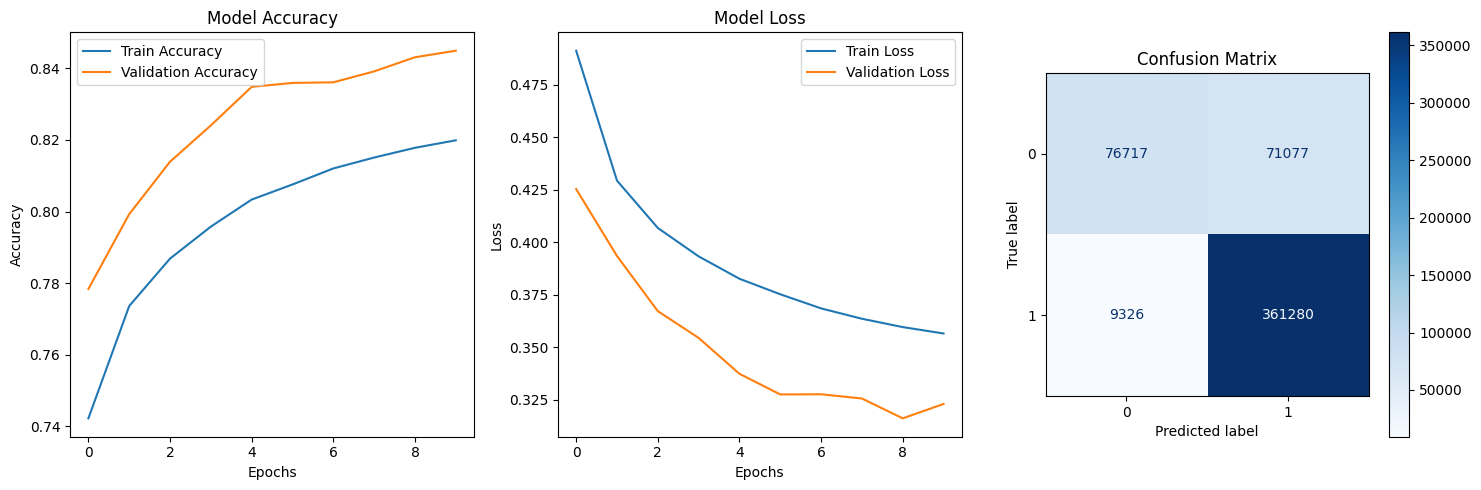

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
y_true = y_test  # True class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Create subplots: 1 row, 3 columns
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot training & validation accuracy
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot training & validation loss
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(ax=ax[2], cmap="Blues")
ax[2].set_title('Confusion Matrix')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

Save to .pkl

In [ ]:
save_path = "/content/drive/MyDrive/"

# Save the best model with the specified name
save_file = f"{save_path}/fyp3_liking.pkl"
joblib.dump(model, save_file)

['/content/drive/MyDrive//fyp3_liking.pkl']

Load from .pkl

In [ ]:
# temp=X_test[268400]

# # Assuming X_test[0] has shape (709,)
# reshaped_data = np.reshape(temp, (1, temp.shape[0]))

In [ ]:
import joblib

# Specify the path to the saved model file
save_path = "/content/drive/MyDrive/"
save_file = f"{save_path}/fyp3_liking.pkl"

# Load the model
loaded_model = joblib.load(save_file)

# Make predictions on the test data
y_pred = loaded_model.predict(reshaped_data)

binary_prediction = (y_pred > 0.5).astype(int)
print(binary_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[0]]


# **Valence**

In [ ]:
main_df['Valence']

,Valence
0,6.96
1,6.96
2,6.96
3,6.96
4,6.96
...,...
2591995,7.06
2591996,7.06
2591997,7.06
2591998,7.06


In [ ]:
# Thresholding the 'Dominance' column
main_df['valence_bin'] = (main_df['Valence'] >= 4.5).astype(int)

In [ ]:
Counter(main_df['valence_bin'])

Counter({1: 1614000, 0: 978000})

In [ ]:
# Labels (binary column 'arousal_bin')
y = main_df['valence_bin'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[-0.083051,  0.065726, -0.994376, ...,  0.      ,  0.      ,
         0.      ],
       [-0.022775,  0.139665, -0.989937, ...,  0.      ,  0.      ,
         0.      ],
       [-0.012558,  0.27994 , -0.959935, ...,  1.      ,  0.      ,
         1.      ],
       ...,
       [-0.097036,  0.14361 , -0.984866, ...,  0.      ,  0.      ,
         0.      ],
       [-0.125262,  0.203313, -0.971068, ...,  0.      ,  0.      ,
         0.      ],
       [-0.136752,  0.16993 , -0.975922, ...,  0.      ,  0.      ,
         0.      ]])

In [ ]:
y_train

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
# Normalize features for better training (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.98122295, -1.45921692, -0.65446011, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [ 0.04851898, -0.70708798, -0.53708069, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [ 0.22306396,  0.71982999,  0.25625501, ...,  9.3605113 ,
        -0.01066887,  3.10919694],
       ...,
       [-1.22013961, -0.66695829, -0.40298945, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [-1.70234639, -0.05964207, -0.03813224, ..., -0.10683177,
        -0.01066887, -0.32162646],
       [-1.89863902, -0.39922362, -0.1664854 , ..., -0.10683177,
        -0.01066887, -0.32162646]])

In [ ]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,  # Adjust epochs based on performance
    batch_size=32,  # Adjust batch size based on data size
    verbose=1
)

Epoch 1/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 219s 3ms/step - accuracy: 0.6635 - loss: 0.6006 - val_accuracy: 0.7631 - val_loss: 0.4800
Epoch 2/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 210s 3ms/step - accuracy: 0.7377 - loss: 0.4922 - val_accuracy: 0.7919 - val_loss: 0.4319
Epoch 3/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 208s 3ms/step - accuracy: 0.7609 - loss: 0.4552 - val_accuracy: 0.8103 - val_loss: 0.3940
Epoch 4/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 206s 3ms/step - accuracy: 0.7754 - loss: 0.4332 - val_accuracy: 0.8234 - val_loss: 0.3704
Epoch 5/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 206s 3ms/step - accuracy: 0.7853 - loss: 0.4178 - val_accuracy: 0.8398 - val_loss: 0.3631
Epoch 6/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 215s 3ms/step - accuracy: 0.7933 - loss: 0.4062 - val_accuracy: 0.8468 - val_loss: 0.3444
Epoch 7/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 214s 3ms/step - accuracy: 0.7987 - loss: 0.3958 - val_accuracy: 0.8486 - val_loss: 0.3374
Epoch 8/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 211s 3ms/step - ac

In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 86.55%


16200/16200 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step


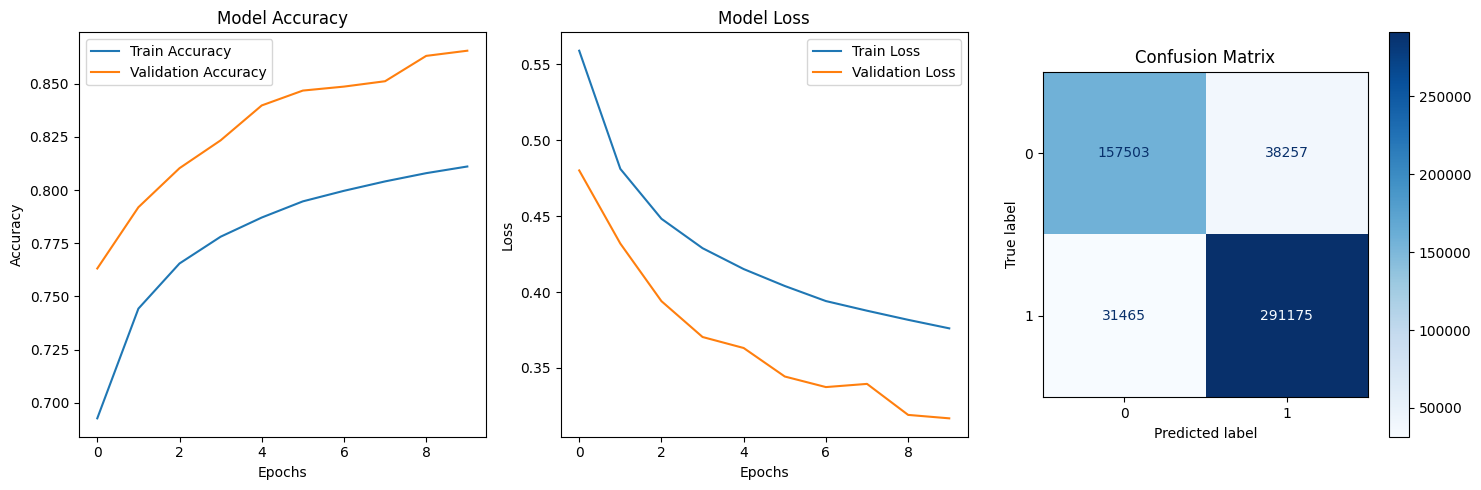

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
y_true = y_test  # True class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Create subplots: 1 row, 3 columns
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot training & validation accuracy
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot training & validation loss
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(ax=ax[2], cmap="Blues")
ax[2].set_title('Confusion Matrix')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

Save to .pkl

In [ ]:
save_path = "/content/drive/MyDrive/"

# Save the best model with the specified name
save_file = f"{save_path}/fyp3_valence.pkl"
joblib.dump(model, save_file)

['/content/drive/MyDrive//fyp3_valence.pkl']

Load from .pkl

In [ ]:
# temp=X_test[268400]

# # Assuming X_test[0] has shape (709,)
# reshaped_data = np.reshape(temp, (1, temp.shape[0]))

In [ ]:
import joblib

# Specify the path to the saved model file
save_path = "/content/drive/MyDrive/"
save_file = f"{save_path}/fyp3_valence.pkl"

# Load the model
loaded_model = joblib.load(save_file)

# Make predictions on the test data
y_pred = loaded_model.predict(reshaped_data)

binary_prediction = (y_pred > 0.5).astype(int)
print(binary_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[0]]
